Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


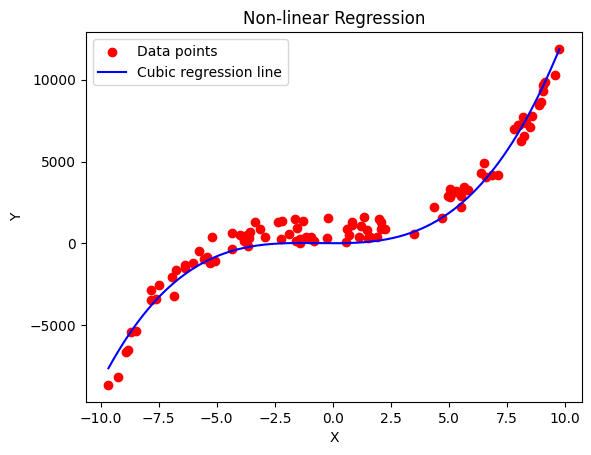

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Loading the data from Google Drive:
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/ML/HW2_nonlinear_data.csv'
df_nonlinear = pd.read_csv(file_path)

# Extract X and Y values
X_nonlinear = df_nonlinear.iloc[:, 0].values
Y_nonlinear = df_nonlinear.iloc[:, 1].values

# Initialize parameters for Non-linear Regression (a, b, c, d for the cubic model)
a = 0
b = 0
c = 0
d = 0

# Learning rate:
L_nonlinear = 1e-6

# The number of iterations:
epochs_nonlinear = 10000

# Number of elements in X:
n_nonlinear = float(len(X_nonlinear))

# Performing Gradient Descent f:
for i in range(epochs_nonlinear):
    Y_pred_nonlinear = a * X_nonlinear**3 + b * X_nonlinear**2 + c * X_nonlinear + d  # The current predicted value of Y
# Calculating gradients:
    D_a = (-2/n_nonlinear) * sum(X_nonlinear**3 * (Y_nonlinear - Y_pred_nonlinear))
    D_b = (-2/n_nonlinear) * sum(X_nonlinear**2 * (Y_nonlinear - Y_pred_nonlinear))
    D_c = (-2/n_nonlinear) * sum(X_nonlinear * (Y_nonlinear - Y_pred_nonlinear))
    D_d = (-2/n_nonlinear) * sum(Y_nonlinear - Y_pred_nonlinear)
# Updating the parameters:
    a = a - L_nonlinear * D_a
    b = b - L_nonlinear * D_b
    c = c - L_nonlinear * D_c
    d = d - L_nonlinear * D_d

# Making predictions:
Y_pred_nonlinear = a * X_nonlinear**3 + b * X_nonlinear**2 + c * X_nonlinear + d

# Calculating Mean Squared Error (MSE):
mse_nonlinear = np.mean((Y_nonlinear - Y_pred_nonlinear)**2)

# Plotting the results:
plt.scatter(X_nonlinear, Y_nonlinear, color='red', label='Data points')
X_smooth = np.linspace(min(X_nonlinear), max(X_nonlinear), 300)
Y_smooth = a * X_smooth**3 + b * X_smooth**2 + c * X_smooth + d
plt.plot(X_smooth, Y_smooth, color='blue', label='Cubic regression line')
plt.title('Non-linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()